In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [8]:
from scipy.spatial.distance import pdist
class LennardJones:
    def __init__(self, eps0=5, sigma=2**(-1/6), kT=10, static_coords=[[-1,0], [1,0]], dynamic_coords=[[-1.5,1.5]], x_range=[-2,2], y_range=[-2,2]):
        self.eps0 = eps0
        self.sigma = sigma
        self.kT = kT
        self.static_coords = np.array(static_coords)
        self.dynamic_coords = np.array(dynamic_coords)
        self.all_cords = np.array(static_coords + dynamic_coords)
        self.dists = pdist(self.all_cords)
        self.rs = [self.dynamic_coords[0]]
        self.Es = [self.energy(self.dists)]
        self.x_range = x_range
        self.y_range = y_range
        
    def potential(self, r):
        return 4*self.eps0*((self.sigma/r)**12-(self.sigma/r)**6)

    def energy(self, dists):
        return np.sum(self.potential(self.dists))
    
    def plot_atoms(self, ax):
        energy = self.energy()
        ax.set(xlabel=r"$x$", ylabel=r"$y$", title=fr"$E = {energy:.3f}$", aspect="equal", xlim=self.x_range, ylim=self.y_range)
        ax.grid(alpha=0.5)
        ax.scatter(self.static_coords[:,0], self.static_coords[:,1], s=1000)
        ax.scatter(self.dynamic_coords[:,0], self.dynamic_coords[:,1], s=1000)
    
    def energy_at_point(self, point):
        point = np.array(point)
        all_cords = np.concatenate([self.static_coords, [point]])
        dists = pdist(all_cords)
        return np.sum(self.potential(dists))
    
    def plot_energy_landscape(self, ax, x_range=None, y_range=None, levels=20, cmap='hot_r'):
        if x_range is None:
            x_range = self.x_range
        if y_range is None:
            y_range = self.y_range
        
        x = np.linspace(*x_range, 100)
        y = np.linspace(*y_range, 100)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)
        for i in range(len(x)):
            for j in range(len(y)):
                Z[j,i] = self.energy_at_point([x[i], y[j]])
        ax.set(xlabel=r"$x$", ylabel=r"$y$", title=r"Energy landscape", aspect="equal", xlim=x_range, ylim=y_range)
        ax.grid(alpha=0.5)
        ax.contourf(X, Y, Z, levels=levels, cmap=cmap)
    
    def step(self):
        r_old = self.rs[-1]
        E_old = self.Es[-1]

        r_new = r_old + np.cos(2*np.pi*np.random.rand(2))
        E_new = self.energy_at_point(r_new)
        DeltaE = E_new - E_old

        if np.random.rand() < np.exp(-DeltaE/self.kT):
            self.rs.append(r_new)
            self.Es.append(E_new)
        else:
            self.rs.append(r_old)
            self.Es.append(E_old)
        self.dynamic_coords = np.array(self.rs[-1])
    
    def search(self, N_steps=9):
        for _ in range(N_steps):
            self.step()
    
    def plot_trajectory(self, ax):
        ax.plot(*np.array(self.rs).T, "o-")

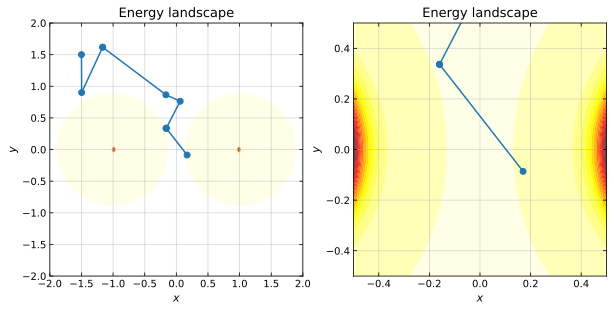

In [11]:
lj = LennardJones()
fig, ax = plt.subplots(1,2, figsize=(10,5))
lj.plot_energy_landscape(ax[0])
lj.plot_energy_landscape(ax[1], x_range=[-0.5,0.5], y_range=[-0.5,0.5])
lj.search()
lj.plot_trajectory(ax[0])
lj.plot_trajectory(ax[1])

fig.savefig('ex12.fig1.png')

In [ ]:
dists